# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "C:/Users/jjime/OneDrive/Git Hub/descriptive-statistics-exercises-project-with-python/assets/imdb_1000.csv"
df = pd.read_csv(url)

#Visualizamos los 5 primeros valores
df.head(5)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [2]:
def cont_caract():
    correc=df["title"].replace(to_replace=r"\s+", value="", regex=True)
    tit_corr=[]
    for title in range(len(correc)):
        tit_corr.append(len(correc.iloc[title]))

x=cont_caract()

In [10]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres, sin incluir espacios) de cada título
df["title_length"]=df["title"].str.replace(" ", "").str.len()
df["title_length"].head(5)

0    22
1    12
2    19
3    13
4    11
Name: title_length, dtype: int64

**MEDIDAS DE TENDENCIA CENTRAL**

*Media*: **$\={x}=\frac{∑x_{i}}{n}$**

*Mediana*: **$\text{Med}(X) = \begin{cases} X\left[\frac{n+1}{2}\right] & \text{si } n \text{ es impar} \\ \frac{X\left[\frac{n}{2}\right] + X\left[\frac{n}{2} + 1\right]}{2} & \text{si } n \text{ es par} \end{cases}$**

Moda: Valor con mayor frecuencia relativa

In [71]:
# Calcula media, mediana y moda de la columna 'title_length'
## Media: suma de todos los valores partido el numero de observaciones
def media(x):
    return sum(x)/len(x)

## Mediana: valor central valor central después de ordenar los datos (nº impar datos), media de los dos valores centrales (nº par datos)
def mediana(x):
    if len(df["title_length"])%2==0: #par: media de los dos valores centrales
        x=x.sort_values()
        return (x.iloc[int(len(x)/2)-1]+(x.iloc[int(len(x)/2)]))/2

    else: #impar: valor central valor central
        return x.sort_values().iloc[round(len(x)/2)]
    
## Moda: 
def moda(x):
    return x.value_counts().index[0]

**MEDIDAS DE DISPERSIÓN**

*Rango*:  $R=M_{áx}-M_{ín}$

*Varianza*: $\sigma ^{2}=\frac{\Sigma (x-\={x} )^{2}}{n-1}$

*Desviación estandar*: $\sigma=\sqrt{\sigma ^{2}}$

In [ ]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

##Rango: diferencia entre maximo y minimo
def rango(x):
    nmax=x.sort_values().iloc[int(len(df["title_length"])-1)]
    nmin=x.sort_values().iloc[0]
    return nmax-nmin

##Varianza: media de la diferencia al cuadrado con respecto a la media
def varianza(x):
    suma_diff_cuad=sum((x-media(x))**2)
    return suma_diff_cuad/(len(x)-1)

##Devianza: media de la diferencia con respecto a la media
def desviacion(x):
    suma_diff_cuad=sum((x-media(x))**2)
    return (suma_diff_cuad/(len(x)-1))**(1/2)

**MEDIDAS DE FORMA**

*Asimetría*: $S_{K}=\frac{n}{(n-1)(n-2)}\sum _{i=1}^{n}\left(\frac{x_{i}-\={x}}{s}\right)^{3}$

*Exceso de Curtosis*: $k=\frac{\frac{1}{n}\sum _{i=1}^{n}(x_{i}-\={x})^{4}}{(\frac{1}{n}\sum _{i=1}^{n}(x_{i}-\={x})^{2})^{2}}-3$ 

(comparación frente a distribución normal, curtosis=3)


In [ ]:
# Calcula asimetría y curtosis de la columna 'title_length'

##Asimetría: distribucion colas (izq/derech)
def asimetria(x):
    suma_cubo=sum(((x-media(x))/desviacion(x))**3)
    operador=len(x)/((len(x)-1)*(len(x)-2))
    return operador*suma_cubo

##Curtosis
def curtosis(x):
    num=(1/len(x))*(sum((x-media(x))**4))
    deno=((1/len(x))*(sum((x-media(x))**2)))**2
    return (num/deno)-3

In [152]:
# Imprime el título más corto y el título más largo según su longitud
print(f"Pelicula con el título más corto: {df.loc[df["title_length"].idxmin(), "title"]}")
print(f"Pelicula con el título más largo: {df.loc[df["title_length"].idxmax(), "title"]}")

Pelicula con el título más corto: M
Pelicula con el título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


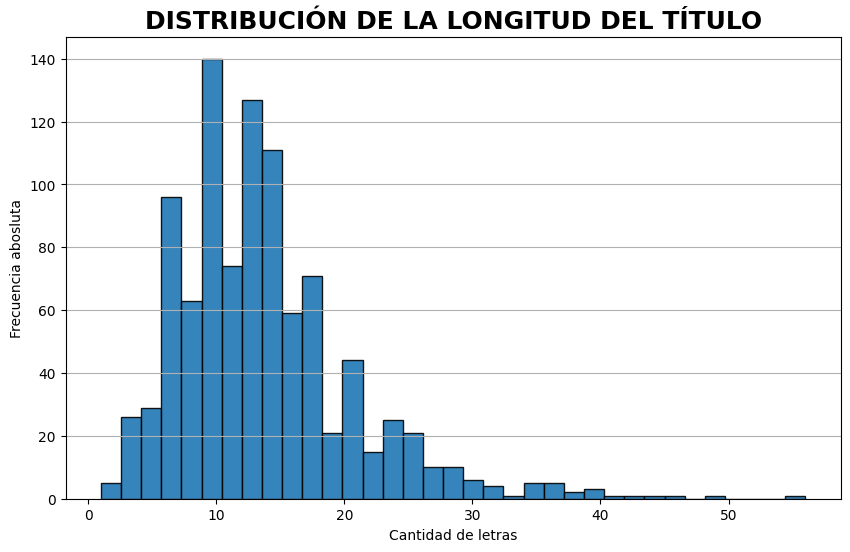

In [ ]:
#Representación gráfica
plt.figure(figsize=(10, 6))
plt.hist(df["title_length"], bins="auto", edgecolor='black', alpha=0.9)
plt.title("Distribución de la longitud del título".upper(), fontweight="bold", size=18)
plt.xlabel("Cantidad de letras")
plt.ylabel("Frecuencia abosluta")
plt.grid(axis="y")
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [167]:
from numpy import random

In [178]:
# Creamos una lista con 5 valores aleatorios de df['title_length']
indices=random.randint(0, len(df["title_length"]), 5)
valores=df["title_length"].iloc[indices].to_list()
valores

[17, 8, 19, 11, 16]

In [ ]:
# Calculamos la media
print(f"Media: {media(valores)} letras")

Media: 14.2 letras


In [ ]:
# Calculamos la varianza y las desviancion tipica
print(f"Varianza: {varianza(pd.Series(valores))} letras al cuadrado")
print(f"Desviación típica: {desviacion(pd.Series(valores))} letras")

Varianza: 20.7 letras al cuadrado
Desviación típica: 4.54972526643093 letras
